## WEBSCRAPER INSIGHTS: ANALYZING THANE'S RENTAL MARKET DYNAMICS. 

In this project, I have undertaken the following steps:

Step 1: Web Scraping from NoBroker.com: I will gather real estate data from NoBroker.com using web scraping techniques.

Step 2: Creating Dataframe from Scraped Data: I will organize the scraped data into a structured dataframe for analysis.

Step 3: Basic Understanding of the Scraped Dataset: I will conduct preliminary exploration to understand the structure and content of the dataset.

Step 4: Data Insights and Exploration: I will analyze the dataset to uncover trends, patterns, and insights related to rental properties in the target area.

Step 5: Conclusion: Based on the findings, I will summarize the key insights and implications drawn from the analysis, providing valuable information for tenants and landlords alike.

## Step 1: Web Scraping from NoBroker.com. 

In [ ]:
# Importing all necessary libraries for web scraping.

import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service
import time  

In [ ]:
# Creating a Service object for ChromeDriver and specifying its path.
s = Service('C:/Users/rohit/OneDrive/Desktop/Driver/chromedriver.exe') 
# Creating a Chrome WebDriver object and passing the Service object.
driver = webdriver.Chrome(service=s) 

# Navigating to the NoBroker.com URL using the Chrome WebDriver.
driver.get('https://www.nobroker.in/property/rent/mumbai/multiple?searchParam=W3sibGF0IjoxOS4yNDY3MjE4LCJsb24iOjcyLjk3NTk3MTMsInBsYWNlSWQiOiJDaElKNjQwYUNCSzU1enNSaWZwc0V5U1kydU0iLCJwbGFjZU5hbWUiOiJUaGFuZSBXZXN0In0seyJsYXQiOjE5LjE4MzQ4OTUsImxvbiI6NzIuOTc4MDczMSwicGxhY2VJZCI6IkNoSUpNd0RjaDl1NDV6c1JzQnRoUlQ2ekZmTSIsInBsYWNlTmFtZSI6IlRoYW5lIEVhc3QifV0=&radius=2.0&sharedAccomodation=0&city=mumbai&locality=Thane%20West,Thane%20East')    
# Maximizing the browser window
driver.maximize_window()

# Pausing the script execution for 5 seconds 
time.sleep(5) 

In [ ]:
# Creating continuous while loop until the condition is met. 

while True:
    
    # Get the current height of the webpage. 
    height = driver.execute_script('return document.body.scrollHeight')  
    # Scroll to the bottom of the webpage.
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight)') 
    # Pause the script execution for 10 seconds to allow the data from the currently scrolled webpage to load successfully.
    time.sleep(10)  
    # Get the new height of the webpage after scrolling. 
    new_height = driver.execute_script('return document.body.scrollHeight') 
    
    # If the height remains the same after scrolling, break out of the loop.
    # This condition ensures that when infinite scrolling is completed and all the data from this URL is loaded,
    # the height of the pages remains constant, indicating that the loop should be exited.
    if height == new_height:
        
        break 

In [ ]:
# Using BeautifulSoup to parse the HTML source code of the current webpage loaded in the WebDriver.

info = BeautifulSoup(driver.page_source, "html.parser")  

In [ ]:
# Printing the parsed HTML source code of the loaded webpage. 

info 

In [ ]:
# Finding all div elements with the specified class in the parsed HTML content. 

temp = info.find_all('div', class_='p-1.5p flex border-b border-b-solid border-cardbordercolor tp:py-1p tp:px-1.5p tp:border-b-0') 

In [ ]:
# Printing the list of BeautifulSoup Tag objects containing div elements matching the specified criteria. 

temp

In [ ]:
# Extracting rental price and maintenance information using Python coding.
# Two nested loops are used to iterate through the BeautifulSoup Tag objects,
# extract relevant data, and store it in separate lists for further processing.

temp_rent = [] 
temp_maintenance = [] 

for val in temp:  
    
    # Find the div element containing rental and maintenance information. 
    data = val.find('div', attrs={'class':'flex', 'id':'minimumRent'}) 
    
    # Extract the text content and strip any leading or trailing whitespace. 
    text_val = data.text.strip()
    
    rent_str = ''
    count = 2
    
    for ch in text_val[2:]:
        
        if ch == 'l': 
            
            break 
        
        if ch >= '0' and ch <= '9' or ch==',': 
            
            rent_str = rent_str + ch 
        
        else: 
            
            break
        
        count = count + 1
    
    if text_val[2] == 'l': 
        
        rent_str = text_val[:12] 
        sub_str = text_val[12:]
        
        temp_rent.append(rent_str)
        temp_maintenance.append(sub_str.strip()) 
    
    else:
    
        sub_str = text_val[count:]

        temp_rent.append(rent_str)
        temp_maintenance.append(sub_str.strip()) 

In [ ]:
# Printing temp_rent to check if data loaded properly.

temp_rent

In [ ]:
# Printing temp_maintenance to check if data loaded properly.

temp_maintenance 

In [ ]:
# Extracting deposit information using Python coding, for loop used to iterate.

temp_deposit = [] 

for val in temp:
    
    # Find the div element containing deposit information. 
    data = val.find('div', attrs={'class':'font-semi-bold heading-6', 'id':'roomType'})  
    
    temp_deposit.append(data.text.strip())  

In [ ]:
# Printing temp_deposit to check if data loaded properly.

temp_deposit

In [ ]:
# Extracting square footage information from the BeautifulSoup Tag objects in temp. 
# Iterates through each tag to find the div element containing square footage data. 

temp_sqft = [] 

for val in temp:
    
    data = val.find('div', attrs={'class':'flex', 'id':'unitCode'})  
    
    temp_sqft.append(data.text.strip())  

In [ ]:
# Printing temp_sqft to check if data loaded properly.

temp_sqft

In [ ]:
# Finding all h2 elements with the specified class in the parsed HTML content.
# temp stores a list of BeautifulSoup Tag objects representing the found elements.

temp = info.find_all('h2', class_='heading-6 flex items-center font-semi-bold m-0')

In [ ]:
# Printing the list of BeautifulSoup Tag objects. 

temp

In [ ]:
# Extracting location information from the text content of each BeautifulSoup Tag object in temp.
# Iterates through each tag, strips the text content, and splits it to extract the location.

temp_location = [] 

for val in temp: 
    
    data = val.text.strip()
    
    location_str = data.split('In ', maxsplit=1)[1]
    
    temp_location.append(location_str) 

In [ ]:
# Printing temp_location to check if data loaded properly.

temp_location

In [ ]:
# Finding all div elements with the specified class in the parsed HTML content. 

temp = info.find_all('div', class_='heading-7 flex') 

In [ ]:
# Printing the list of BeautifulSoup Tag objects. 

temp

In [ ]:
# Extracting rental type information from every second element in the 'temp' list.
# Iterates through the indices from 0 to 4956 (exclusive), incrementing by 2 each time.

temp_rent_type = [] 

for val in range(0,4956,2):
    
    data = temp[val].text.strip()
    
    data = data[data.find("(")+1:data.find(")")]
    
    temp_rent_type.append(data) 

In [ ]:
# Printing temp_rent_type to check if data loaded properly.

temp_rent_type

In [ ]:
# Finding all div elements with the specified class in the parsed HTML content. 

temp = info.find_all('div', class_='border-3 border-double border-property-views-border-color flex flex-col') 

In [ ]:
# Printing the list of BeautifulSoup Tag objects.  

temp

In [ ]:
# Extracting furnishing, apartment type, preferred tenants, and available from information from each element in temp.
# Iterates through each BeautifulSoup Tag object in temp.
# Finds specific div elements within each tag to extract relevant information and appends it to respective lists.

temp_furnishing = []
temp_apartment_type = []
temp_preferred_tenants = [] 
temp_available_from = [] 

for val in temp:
    
    data1 = val.find('div', class_='font-semibold')
    data2 = val.find('div', class_='flex flex-1 pl-0.5p').find('div', class_='font-semibold')
    data3 = val.find('div', class_='flex flex-1 border-r border-r-solid border-r-cardbordercolor').find('div', class_='font-semibold')
    data4 = val.find('div', class_='flex p-0.5p items-center').find_all('div', class_='font-semibold')[1]
    
    temp_furnishing.append(data1.text.strip()) 
    temp_apartment_type.append(data2.text.strip())  
    temp_preferred_tenants.append(data3.text.strip()) 
    temp_available_from.append(data4.text.strip())   

In [ ]:
# Printing temp_furnishing to check if data loaded properly.

temp_furnishing

In [ ]:
# Printing temp_apartment_type  to check if data loaded properly.

temp_apartment_type 

In [ ]:
# Printing temp_preferred_tenants to check if data loaded properly.

temp_preferred_tenants

In [ ]:
# Printing temp_available_from to check if data loaded properly.

temp_available_from

In [ ]:
# Checking if the lengths of all lists are equal before creating the DataFrame.

print(len(temp_rent)) 
print(len(temp_maintenance))
print(len(temp_location))
print(len(temp_rent_type)) 
print(len(temp_deposit))
print(len(temp_sqft))
print(len(temp_furnishing))
print(len(temp_apartment_type)) 
print(len(temp_preferred_tenants))
print(len(temp_available_from)) 

## Step 2: Creating dataframe from scraped data. 

In [ ]:
# Creating a DataFrame 'NoBroker_Dataset' using extracted data lists.
# Each list corresponds to a specific attribute of the rental properties.
# The DataFrame will have columns for apartment location, rent, deposit, maintenance, square footage, rent type,
# furnishing, apartment type, preferred tenants, and available from information.

NoBroker_Dataset = pd.DataFrame( { 'APRTMENT_LOCATION':temp_location,
                                   'APRTMENT_RENT':temp_rent,
                                   'APRTMENT_DESPOSIT':temp_deposit, 
                                   'APRTMENT_MAINTENANCE':temp_maintenance,
                                   'APARTMENT_SQFT':temp_sqft,
                                   'RENT_TYPE':temp_rent_type,
                                   'APARTMENT_FURNISHING':temp_furnishing,
                                   'APRTMENT_TYPE':temp_apartment_type,
                                   'PREFERRED_TENANTS':temp_preferred_tenants,
                                   'APRTMENT_AVAILABLE_FROM':temp_available_from } )

In [ ]:
# Printing the NoBroker_Dataset DataFrame to verify if it is created properly. 

NoBroker_Dataset

In [ ]:
# Saving the NoBroker_Dataset DataFrame to a CSV file for further data analysis.

NoBroker_Dataset.to_csv(r'C:\Users\rohit\OneDrive\Desktop\DataSets\Created_Datasets\NoBroker_DataSet.csv', index=False)  

## Step 3: Basic Understanding of the Scraped Dataset.

In [3]:
# Importing necessary libraries.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
# Loading CSV file into df variable. 

df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\my_projects\Web_Scraping\Project1_Scrape_Data.csv") 

In [5]:
# Displaying the first few rows. 

df.head()

,APRTMENT_LOCATION,APRTMENT_RENT,APRTMENT_DESPOSIT,APRTMENT_MAINTENANCE,APARTMENT_SQFT,RENT_TYPE,APARTMENT_FURNISHING,APRTMENT_TYPE,PREFERRED_TENANTS,APRTMENT_AVAILABLE_FROM
0,Madhura Chs for Rent In Rj Thakur School And ...,"15,000","₹60,000",No Extra Maintenance,400 sqft,Negotiable,Semi Furnished,1 BHK,Family,Ready to Move
1,Vijay Nagari for Rent In Thane,"23,000","₹1,00,000",No Extra Maintenance,963 sqft,Non-Negotiable,Semi Furnished,2 BHK,All,Ready to Move
2,"Trambakeshwar Apartment for Rent In Charai, ...","16,000","₹70,000",No Extra Maintenance,700 sqft,Negotiable,Unfurnished,1 BHK,Family,Ready to Move
3,"Sanghvi Hills for Rent In Anand Nagar, Thane ...","20,000","₹60,000",No Extra Maintenance,780 sqft,Non-Negotiable,Semi Furnished,2 BHK,Family,Ready to Move
4,Nilgiri Upvan Chs for Rent In Thane West,"38,500","₹1,25,000",No Extra Maintenance,985 sqft,Negotiable,Fully Furnished,2 BHK,Family,01-Dec-2023


In [6]:
# Total number of rows and columns in the df.  

df.shape

(2478, 10)

In [7]:
# Checking for missing values. 

df.isnull().sum() 

# You can clearly see above there are no missing values in the dataset.

APRTMENT_LOCATION          0
APRTMENT_RENT              0
APRTMENT_DESPOSIT          0
APRTMENT_MAINTENANCE       0
APARTMENT_SQFT             0
RENT_TYPE                  0
APARTMENT_FURNISHING       0
APRTMENT_TYPE              0
PREFERRED_TENANTS          0
APRTMENT_AVAILABLE_FROM    0
dtype: int64

In [8]:
# Checking for duplicate values. 

df.duplicated().sum()  

932

In [9]:
# As dataset contains some dupliactes values removing those duplicate values. 

df.drop_duplicates(inplace=True) 

In [10]:
# Dataset overview.  

df.info() 

# As you can see below, all columns are currently in the object datatype. To facilitate data analysis, 
# we will convert them into their respective datatypes in the following steps.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546 entries, 0 to 2477
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   APRTMENT_LOCATION        1546 non-null   object
 1   APRTMENT_RENT            1546 non-null   object
 2   APRTMENT_DESPOSIT        1546 non-null   object
 3   APRTMENT_MAINTENANCE     1546 non-null   object
 4   APARTMENT_SQFT           1546 non-null   object
 5   RENT_TYPE                1546 non-null   object
 6   APARTMENT_FURNISHING     1546 non-null   object
 7   APRTMENT_TYPE            1546 non-null   object
 8   PREFERRED_TENANTS        1546 non-null   object
 9   APRTMENT_AVAILABLE_FROM  1546 non-null   object
dtypes: object(10)
memory usage: 132.9+ KB


## Step 4: Data Insights and Exploration.

In [11]:
# Filtering the data to include cases where house owners accepted only deposits from tenants, excluding rent, for some analysis. 

temp_df = df[df['APRTMENT_RENT'] == 'Only Deposit']

temp_df.sample(4)  

,APRTMENT_LOCATION,APRTMENT_RENT,APRTMENT_DESPOSIT,APRTMENT_MAINTENANCE,APARTMENT_SQFT,RENT_TYPE,APARTMENT_FURNISHING,APRTMENT_TYPE,PREFERRED_TENANTS,APRTMENT_AVAILABLE_FROM
2398,Sai Krupa Chs for Lease In Mulund (w,Only Deposit,"₹10,00,000",No Extra Maintenance,415 sqft,Non-Negotiable,Semi Furnished,1 BHK,Family,01-Dec-2023
304,Vaibhav Apartment Thane for Lease In Yashodha...,Only Deposit,"₹12,00,000",+₹ 500Maintenance,250 sqft,Negotiable,Semi Furnished,1 RK,Company,01-Nov-2023
545,Pradeep Smriti for Lease In Mahagiri Koliwada...,Only Deposit,"₹45,00,000",No Extra Maintenance,650 sqft,Non-Negotiable,Semi Furnished,1 BHK,All,Ready to Move
2347,"Sai Krupa Chsl, Lbs Marg for Lease In Asha Na...",Only Deposit,"₹10,00,000",No Extra Maintenance,315 sqft,Negotiable,Semi Furnished,1 BHK,All,31-Oct-2023


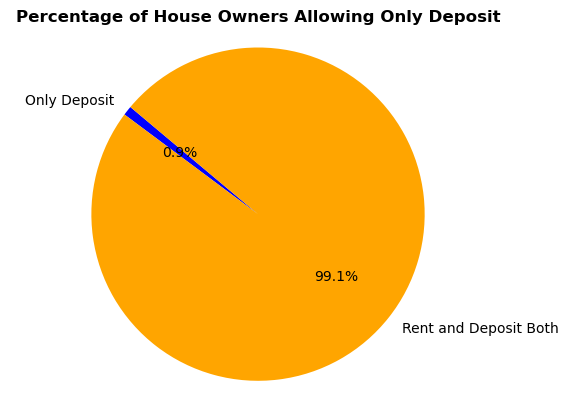

In [12]:
# Data Visualization of Percentage of House Owners Allowing Only Deposit. 

percentage_deposit_only = round((temp_df.shape[0] / df.shape[0]) * 100, 2)
labels = ['Only Deposit', 'Rent and Deposit Both']
sizes = [percentage_deposit_only, 100 - percentage_deposit_only] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange']) 
plt.title('Percentage of House Owners Allowing Only Deposit', fontweight='bold')  
plt.axis('equal')
plt.show()  

### The pie chart above illustrates that merely 0.9 percent of house owners have exclusively accepted deposits from their tenants without any rental payments. 

In [13]:
# Creating dataframe temp_df. 
# Converting the 'APRTMENT_DESPOSIT' column from object to integer for subsequent steps. 

temp_df = temp_df.copy()

temp_df['APRTMENT_DESPOSIT'] = temp_df['APRTMENT_DESPOSIT'].replace({'₹': '', ',': ''}, regex=True).astype(int)   

temp_df['APRTMENT_DESPOSIT']  

99       500000
304     1200000
545     4500000
706     2500000
1363     800000
1460    3500000
1495    5000000
1585     600000
1779     150000
1859     500000
1954     400000
2347    1000000
2398    1000000
2477     800000
Name: APRTMENT_DESPOSIT, dtype: int32

In [14]:
# Converting the 'APRTMENT_RENT' column from object to integer for analysis.

df['APRTMENT_RENT'] = df['APRTMENT_RENT'].replace('Only Deposit', 0)  

df['APRTMENT_DESPOSIT'] = df['APRTMENT_DESPOSIT'].replace({'₹': '', ',': ''}, regex=True).astype(int)  
df['APRTMENT_RENT'] = df['APRTMENT_RENT'].replace({',': ''}, regex=True).astype(int)  

df['APRTMENT_RENT']   

0       15000
1       23000
2       16000
3       20000
4       38500
        ...  
2473    45000
2474    65000
2475    35000
2476    40000
2477        0
Name: APRTMENT_RENT, Length: 1546, dtype: int32

In [15]:
avg_rent = round(df['APRTMENT_RENT'].mean(), 2)

print("\033[1m", 'Average Rent Amount to Live in Thane City is', avg_rent,'INR.')  

 Average Rent Amount to Live in Thane City is 23022.9 INR


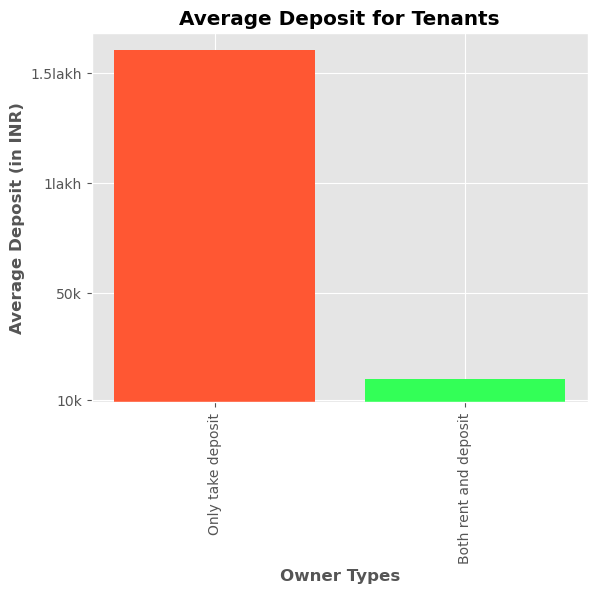

In [16]:
# Data Visualization of Average Deposits for Tenants.  

plt.style.use('ggplot')  

temp_list1 = temp_df['APRTMENT_DESPOSIT'].to_list() 

val1 = round(sum(temp_list1)/len(temp_list1), 2) 

temp_list2 = df[df['APRTMENT_RENT']!=0]['APRTMENT_DESPOSIT'].to_list()

val2 = round(sum(temp_list2)/len(temp_list2), 2)

values = [val1, val2]
labels = ['Only take deposit', 'Both rent and deposit']

# Create the bar graph. 
plt.bar(labels, values, color=['#FF5733', '#33FF57'])

# Add title and labels.
plt.title('Average Deposit for Tenants', fontweight='bold')
plt.xlabel('Owner Types', fontweight='bold')
plt.ylabel('Average Deposit (in INR)', fontweight='bold')
plt.xticks(rotation=90)
plt.yticks([10000, 500000, 1000000, 1500000], ['10k', '50k', '1lakh', '1.5lakh'])
plt.show()   

### In the above bar chart, it's evident that the average deposit for tenants who only pay the deposit is approximately 1.5 lakh INR, whereas for tenants who pay both rent and deposit, it's around 10k INR. This substantial difference indicates the importance of thoroughly reviewing terms and conditions before renting a property, especially for landlords who solely accept deposits.

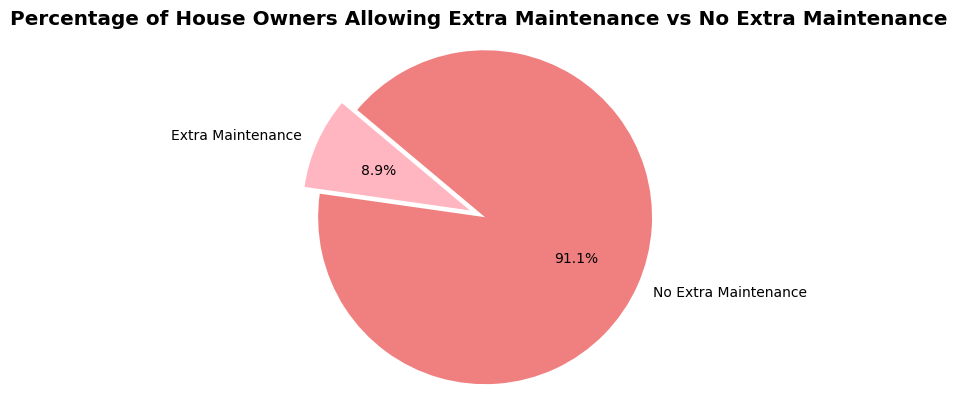

In [17]:
# Data Visualization of Percentage of House Owners Allowing Extra Maintenance vs No Extra Maintenance.

df['APRTMENT_MAINTENANCE'] = df['APRTMENT_MAINTENANCE'].replace('+No Extra Maintenance', 'No Extra Maintenance') 
percentage_extra_maintenance = round((df[df['APRTMENT_MAINTENANCE']!='No Extra Maintenance'].shape[0] / df.shape[0]) * 100, 2)
labels = ['Extra Maintenance', 'No Extra Maintenance'] 
sizes = [percentage_extra_maintenance, 100 - percentage_extra_maintenance] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightpink', 'lightcoral'], explode=(0.1, 0)) 
plt.title('Percentage of House Owners Allowing Extra Maintenance vs No Extra Maintenance', fontweight='bold')  
plt.axis('equal')
plt.show()   

### In the above pie chart, we can observe that only 8.9 percent of house owners are charging maintenance for apartments with rent, while approximately 91 percent of house owners are not charging extra maintenance. Based on this, we can conclude that with thorough house searching, one can find apartments with no additional maintenance fees.

In [18]:
# Converting the data type of the 'APRTMENT_MAINTENANCE' column from object to integer to calculate the average maintenance. 

df['APRTMENT_MAINTENANCE'] = df['APRTMENT_MAINTENANCE'].replace('No Extra Maintenance', '0') 
df['APRTMENT_MAINTENANCE'] = df['APRTMENT_MAINTENANCE'].str.replace('Maintenance', '')
df['APRTMENT_MAINTENANCE'] = df['APRTMENT_MAINTENANCE'].apply(lambda x: x.replace('+₹', '')) 
df['APRTMENT_MAINTENANCE'] = df['APRTMENT_MAINTENANCE'].str.replace(',', '').astype(int)  

In [19]:
avg_maintenance = round(df['APRTMENT_MAINTENANCE'].mean(), 2)

print("\033[1m", 'Average Maintenance Amount to Live in Thane City is', avg_maintenance,'INR.')  

 Average Maintenance Amount to Live in Thane City is 231.66 INR


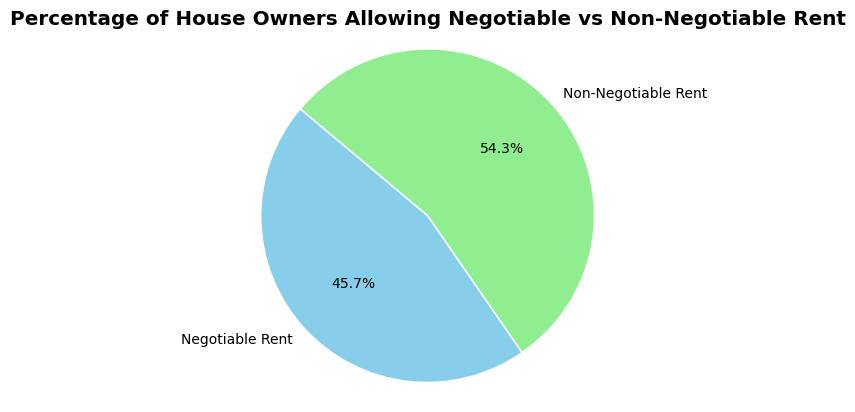

In [20]:
# Data Visualization of Percentage of House Owners Allowing Negotiable vs Non-Negotiable Rent. 

percentage_extra_maintenance = round((df[df['RENT_TYPE']=='Non-Negotiable'].shape[0] / df.shape[0]) * 100, 2)
labels = ['Negotiable Rent', 'Non-Negotiable Rent'] 
sizes = [percentage_extra_maintenance, 100 - percentage_extra_maintenance] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'], explode=(0.01, 0)) 
plt.title('Percentage of House Owners Allowing Negotiable vs Non-Negotiable Rent', fontweight='bold')  
plt.axis('equal')
plt.show()    

### In the presented pie chart, it's evident that around 54 percent of house owners are willing to negotiate rent, while about 46 percent maintain a non-negotiable stance. This insight suggests that while negotiation opportunities exist for a considerable portion of apartments, a significant proportion may have fixed rental terms.

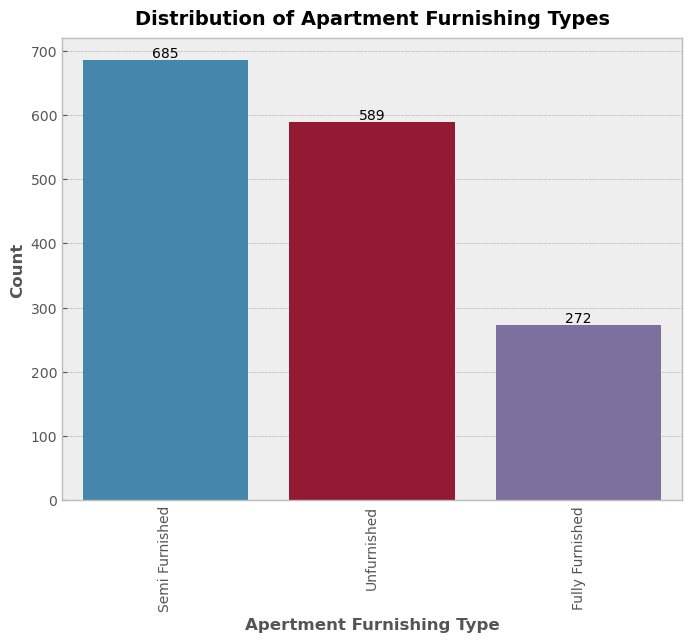

In [21]:
# Data Visualization of Distribution of Apartment Furnishing Types. 

plt.style.use('bmh') 

plt.figure(figsize=(8,6))

graph = sns.countplot(data=df, x='APARTMENT_FURNISHING') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Distribution of Apartment Furnishing Types', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Apertment Furnishing Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation='vertical')
plt.show()    

### In the presented bar chart, it's apparent that in Thane city, the majority of apartments, totaling 685, are semi-furnished. Typically, semi-furnished apartments offer essential furniture items and appliances. Among the available options, 589 apartments are unfurnished, suggesting that tenants may expect lower rental rates and deposit requirements, albeit requiring additional furnishing. Conversely, 272 apartments are fully furnished, offering convenience with all necessary furnishings and amenities.

In [22]:
# Data about Number of Available Apartments based on Apartment Type. 

apartment_type_df = df['APRTMENT_TYPE'].value_counts().reset_index()
apartment_type_df.rename(columns={'index':'Apartment Type', 'APRTMENT_TYPE':'Available Apartments'}, inplace=True) 

apartment_type_df 

,Apartment Type,Available Apartments
0,1 BHK,618
1,2 BHK,516
2,1 RK,290
3,3 BHK,105
4,4 BHK,14
5,4+ BHK,3


Based on the data: There are plenty of options available for 1 BHK, 2 BHK, and 1 RK apartments, with 618, 516, and 290 listings respectively. However, the availability decreases significantly for larger apartments. There are only 105 listings for 3 BHK, 14 for 4 BHK, and merely 3 for 4+ BHK apartments.

Therefore, if you are looking for smaller apartments (1 BHK, 2 BHK, 1 RK), you have a wide range of options to choose from. Conversely, if you are in need of larger apartments (3 BHK, 4 BHK, 4+ BHK), the options are relatively limited.

In [23]:
# Data about Average Rent of Aprtments Based on Apartment Type. 

avg_rent = df.groupby('APRTMENT_TYPE')['APRTMENT_RENT'].mean().round().reset_index()
avg_rent.rename(columns={'APRTMENT_TYPE':'Apartment Type', 'APRTMENT_RENT':'Average Rent'}, inplace=True) 

print('Average Rent of Apartments Based on Apartment Type:')
avg_rent

Average Rent of Apartments Based on Apartment Type:


,Apartment Type,Average Rent
0,1 BHK,17756.0
1,1 RK,10027.0
2,2 BHK,29028.0
3,3 BHK,49829.0
4,4 BHK,92500.0
5,4+ BHK,69000.0


In [24]:
# Converting 'APARTMENT_SQFT' column to integers foe further analysis. 

df['APARTMENT_SQFT'] = df['APARTMENT_SQFT'].str.replace(' sqft', '').str.replace(',', '').astype(int)  

In [25]:
# Data about Average SqFt of Aprtments by Apartment Type. 

avg_sqft = df.groupby('APRTMENT_TYPE')['APARTMENT_SQFT'].mean().round().reset_index()
avg_sqft.rename(columns={'APRTMENT_TYPE':'Apartment Type', 'APARTMENT_SQFT':'Average SqFt'}, inplace=True) 

print('Average SqFt of Apartments by Apartment Type:')
avg_sqft

Average SqFt of Apartments by Apartment Type:


,Apartment Type,Average SqFt
0,1 BHK,539.0
1,1 RK,284.0
2,2 BHK,856.0
3,3 BHK,1279.0
4,4 BHK,2061.0
5,4+ BHK,2133.0


### Explore the Average Rent and Average SqFt of Apartments to gain valuable data into budgeting and choosing the right area for your preferences. Make informed decisions for a comfortable and well-suited living space.  

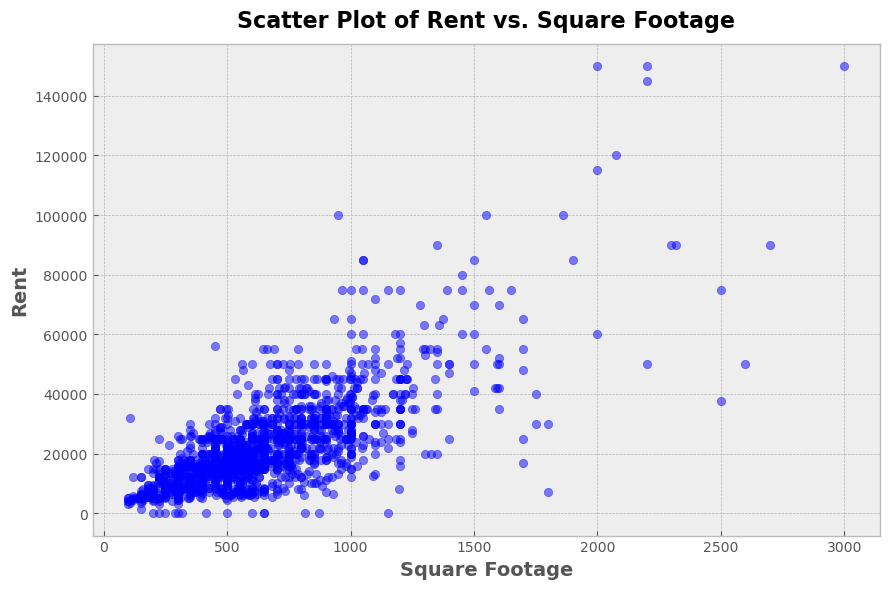

In [26]:
# Creating the Scatter Plot of Rent vs. Square Footage. 

sqft = df['APARTMENT_SQFT']
rent = df['APRTMENT_RENT']

plt.figure(figsize=(9, 6))
plt.scatter(sqft, rent, color='blue', alpha=0.5)  
plt.title('Scatter Plot of Rent vs. Square Footage', fontsize=16, fontweight='bold', pad=12)
plt.xlabel('Square Footage', fontsize=14, fontweight='bold')
plt.ylabel('Rent', fontsize=14, fontweight='bold')
plt.grid(True)  
plt.tight_layout()

plt.show() 

### Based on the scatter plot showing square footage (sqft) against rent, you can observe a simple linear relationship between the two variables. As square footage increases, there's a tendency for rent to also increase.

In the 'APRTMENT_LOCATION' column, I have data containing the complete address of the apartments. However, I aim to focus my analysis on specific areas. In India, the value of locations is often determined by their distance from the railway station, measured in kilometers. After researching Thane city, I have identified various area names mentioned in the addresses. I intend to categorize these areas based on their distance from the railway station: within 2 km, 2 to 5 km, 5 to 8 km, and beyond 8 km. This segmentation will facilitate further analysis and insights. 

In [27]:
# Filtering dataset based on area which is within 2km from railway station. 
Area = ['Uthalsar', 'Panchpakhadi', 'Panch Pakhadi', 'Kopri', 'Naupada', 'Court Naka'] 
pattern = '|'.join(Area)
dataset1 = df[df['APRTMENT_LOCATION'].str.contains(pattern)]   

# Calculate average rent by apartment type.
temp_rent = dataset1.groupby('APRTMENT_TYPE')['APRTMENT_RENT'].mean().round().reset_index()
temp_rent.rename(columns={'APRTMENT_TYPE':'Apartment Type', 'APRTMENT_RENT':'Average Rent'}, inplace=True) 

# Calculate average sqft by apartment type. 
temp_sqft = dataset1.groupby('APRTMENT_TYPE')['APARTMENT_SQFT'].mean().round().reset_index()
temp_sqft.rename(columns={'APRTMENT_TYPE':'Apartment Type', 'APARTMENT_SQFT':'Average SqFt'}, inplace=True) 

# Merge the two DataFrames on 'Apartment Type'. 
dataframe = pd.merge(temp_rent, temp_sqft, on='Apartment Type') 

print('Available Aprtments and, Average Rent and SqFt by Apartment Type within 2km from Railway Station:')
dataframe 

Available Aprtments and, Average Rent and SqFt by Apartment Type within 2km from Railway Station:


,Apartment Type,Average Rent,Average SqFt
0,1 BHK,23250.0,528.0
1,1 RK,14900.0,327.0
2,2 BHK,30385.0,830.0


In [28]:
# Filtering dataset based on area between 2km to 5km from railway station. 
Area = ['Rabodi', 'Vrindavan', 'Runwal', 'Rutu', 'Majiwada', 'Gokul Nagar', 
    'Khopat', 'Brindavan', 'Kolbad', 'Pokhran Road', 'Vasant Vihar', 
    'Vartak Nagar', 'Wagle', 'lokmanya Nagar', 'Lokmanya Nagar', 'Dhokali', 'Charai']  
pattern = '|'.join(Area)
dataset1 = df[df['APRTMENT_LOCATION'].str.contains(pattern)]   

# Calculate average rent by apartment type.
temp_rent = dataset1.groupby('APRTMENT_TYPE')['APRTMENT_RENT'].mean().round().reset_index()
temp_rent.rename(columns={'APRTMENT_TYPE':'Apartment Type', 'APRTMENT_RENT':'Average Rent'}, inplace=True) 

# Calculate average sqft by apartment type. 
temp_sqft = dataset1.groupby('APRTMENT_TYPE')['APARTMENT_SQFT'].mean().round().reset_index()
temp_sqft.rename(columns={'APRTMENT_TYPE':'Apartment Type', 'APARTMENT_SQFT':'Average SqFt'}, inplace=True) 

# Merge the two DataFrames on 'Apartment Type'. 
dataframe = pd.merge(temp_rent, temp_sqft, on='Apartment Type') 

print('Available Aprtments and, Average Rent and SqFt by Apartment Type between 2km to 5km from Railway Station:')
dataframe 

Available Aprtments and, Average Rent and SqFt by Apartment Type between 2km to 5km from Railway Station:


,Apartment Type,Average Rent,Average SqFt
0,1 BHK,17978.0,527.0
1,1 RK,8967.0,309.0
2,2 BHK,31789.0,814.0
3,3 BHK,42500.0,1148.0


In [29]:
# Filtering dataset based on area between 5km to 8km from railway station. 
Area = ['Manorama', 'Kasheli', 'Upvan', 'Kholset', 'Brahmand', 'Manpada'] 
pattern = '|'.join(Area)
dataset1 = df[df['APRTMENT_LOCATION'].str.contains(pattern)]   

# Calculate average rent by apartment type.
temp_rent = dataset1.groupby('APRTMENT_TYPE')['APRTMENT_RENT'].mean().round().reset_index()
temp_rent.rename(columns={'APRTMENT_TYPE':'Apartment Type', 'APRTMENT_RENT':'Average Rent'}, inplace=True) 

# Calculate average sqft by apartment type. 
temp_sqft = dataset1.groupby('APRTMENT_TYPE')['APARTMENT_SQFT'].mean().round().reset_index()
temp_sqft.rename(columns={'APRTMENT_TYPE':'Apartment Type', 'APARTMENT_SQFT':'Average SqFt'}, inplace=True) 

# Merge the two DataFrames on 'Apartment Type'. 
dataframe = pd.merge(temp_rent, temp_sqft, on='Apartment Type') 

print('Available Aprtments and, Average Rent and SqFt by Apartment Type between 5km to 8km from Railway Station:')
dataframe  

Available Aprtments and, Average Rent and SqFt by Apartment Type between 5km to 8km from Railway Station:


,Apartment Type,Average Rent,Average SqFt
0,1 BHK,12312.0,546.0
1,1 RK,8000.0,160.0
2,2 BHK,23329.0,868.0
3,4 BHK,75000.0,2500.0


In [30]:
# Filtering dataset based on area which is more than 8km from railway station. 
Area = ['Anand Nagar', 'Kasarvadavali', 'Bhayandarpada', 'Ghodbunder', 'Ovala', 'Wagbil', 'Kalher']
pattern = '|'.join(Area)
dataset1 = df[df['APRTMENT_LOCATION'].str.contains(pattern)]   

# Calculate average rent by apartment type.
temp_rent = dataset1.groupby('APRTMENT_TYPE')['APRTMENT_RENT'].mean().round().reset_index()
temp_rent.rename(columns={'APRTMENT_TYPE':'Apartment Type', 'APRTMENT_RENT':'Average Rent'}, inplace=True) 

# Calculate average sqft by apartment type. 
temp_sqft = dataset1.groupby('APRTMENT_TYPE')['APARTMENT_SQFT'].mean().round().reset_index()
temp_sqft.rename(columns={'APRTMENT_TYPE':'Apartment Type', 'APARTMENT_SQFT':'Average SqFt'}, inplace=True) 

# Merge the two DataFrames on 'Apartment Type'. 
dataframe = pd.merge(temp_rent, temp_sqft, on='Apartment Type') 

print('Available Aprtments and, Average Rent and SqFt by Apartment Type which is more than 8km from Railway Station:')
dataframe  

Available Aprtments and, Average Rent and SqFt by Apartment Type which is more than 8km from Railway Station:


,Apartment Type,Average Rent,Average SqFt
0,1 BHK,13731.0,560.0
1,1 RK,8500.0,375.0
2,2 BHK,20867.0,804.0
3,3 BHK,28167.0,1219.0
4,4 BHK,85000.0,1900.0
5,4+ BHK,150000.0,2000.0


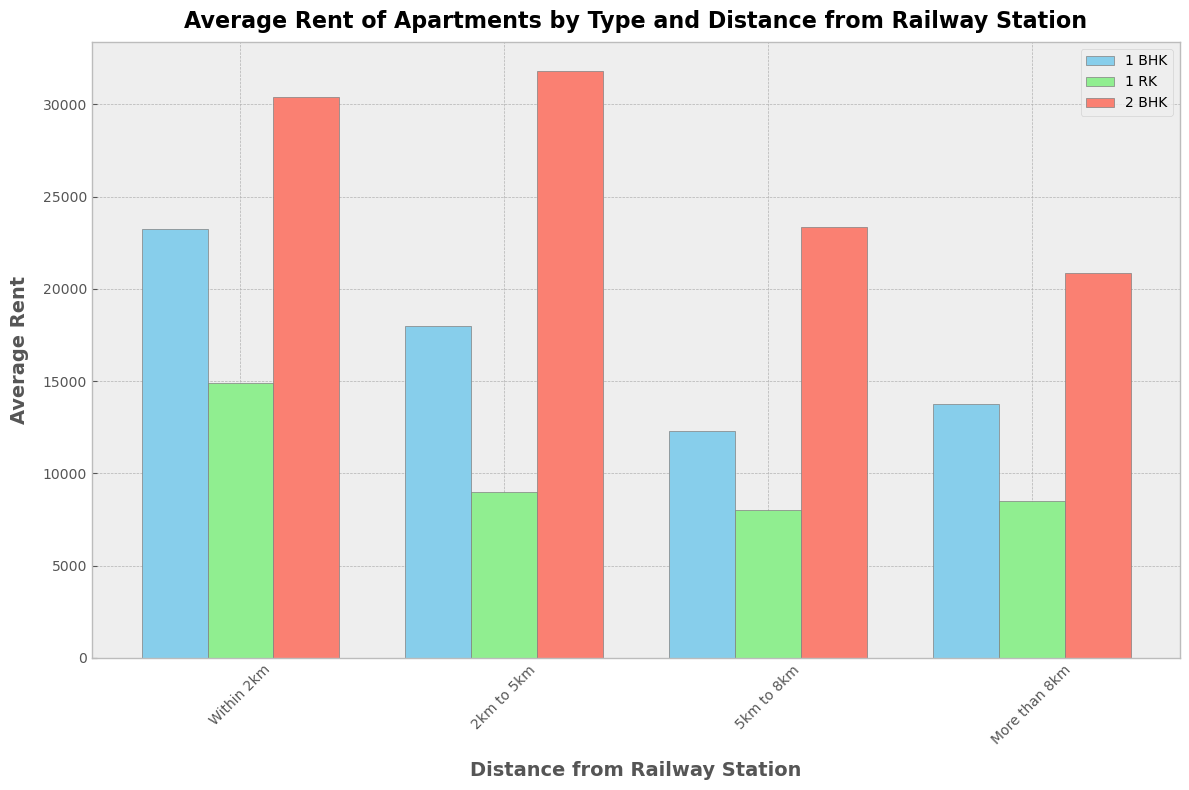

In [31]:
# Data for average rent by apartment type and category. 
categories = ['Within 2km', '2km to 5km', '5km to 8km', 'More than 8km']
avg_rent_1bhk = [23250.0, 17978.0, 12312.0, 13731.0]  
avg_rent_1rk = [14900.0, 8967.0, 8000.0, 8500.0]  
avg_rent_2bhk = [30385.0, 31789.0, 23329.0, 20867.0]  

# Setting the width of the bars. 
bar_width = 0.25

# Set the position of the bars on the x-axis. 
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# plotting bar chart. 
plt.figure(figsize=(12, 8))
plt.bar(r1, avg_rent_1bhk, color='skyblue', width=bar_width, edgecolor='grey', label='1 BHK')
plt.bar(r2, avg_rent_1rk, color='lightgreen', width=bar_width, edgecolor='grey', label='1 RK')
plt.bar(r3, avg_rent_2bhk, color='salmon', width=bar_width, edgecolor='grey', label='2 BHK')

plt.title('Average Rent of Apartments by Type and Distance from Railway Station', fontweight='bold', fontsize=16, pad=10)
plt.xlabel('Distance from Railway Station', fontweight='bold', fontsize=14, labelpad=10)
plt.ylabel('Average Rent', fontweight='bold', fontsize=14, labelpad=10)
plt.xticks([r + bar_width for r in range(len(categories))], categories)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Based on the analysis, it's evident that apartments situated closer to the Thane railway station command higher rents compared to those farther away, despite similar square footage. This trend is clearly depicted in the bar chart, where the average rents for 1 BHK, 1 RK, and 2 BHK apartments are notably higher within 2km and between 2km to 5km from the railway station. Interestingly, there are no 3 BHK or larger apartments within 2km, likely due to the high rental rates in the vicinity. Additionally, 4 BHK and larger apartments are available only beyond 5km from the station, indicating a shift in availability based on distance. These insights can inform strategic decisions regarding apartment selection and budget allocation.

In [32]:
# Furnished Apartments Data based on Apartment type. 

temp_data = df.groupby(['APRTMENT_TYPE','APARTMENT_FURNISHING'])['APRTMENT_RENT'].mean().round().reset_index() 
temp_data.rename(columns={'APRTMENT_TYPE':'Apartment Type', 'APARTMENT_FURNISHING':'Furnishing Type', 'APRTMENT_RENT':'Average Rent'}, inplace=True) 


print('Furnished Aprtments Data based on Aprtment type:')
temp_data

Furnished Aprtments Data based on Aprtment type:


,Apartment Type,Furnishing Type,Average Rent
0,1 BHK,Fully Furnished,22167.0
1,1 BHK,Semi Furnished,18406.0
2,1 BHK,Unfurnished,15168.0
3,1 RK,Fully Furnished,13700.0
4,1 RK,Semi Furnished,11175.0
5,1 RK,Unfurnished,9248.0
6,2 BHK,Fully Furnished,34090.0
7,2 BHK,Semi Furnished,28836.0
8,2 BHK,Unfurnished,25002.0
9,3 BHK,Fully Furnished,50875.0


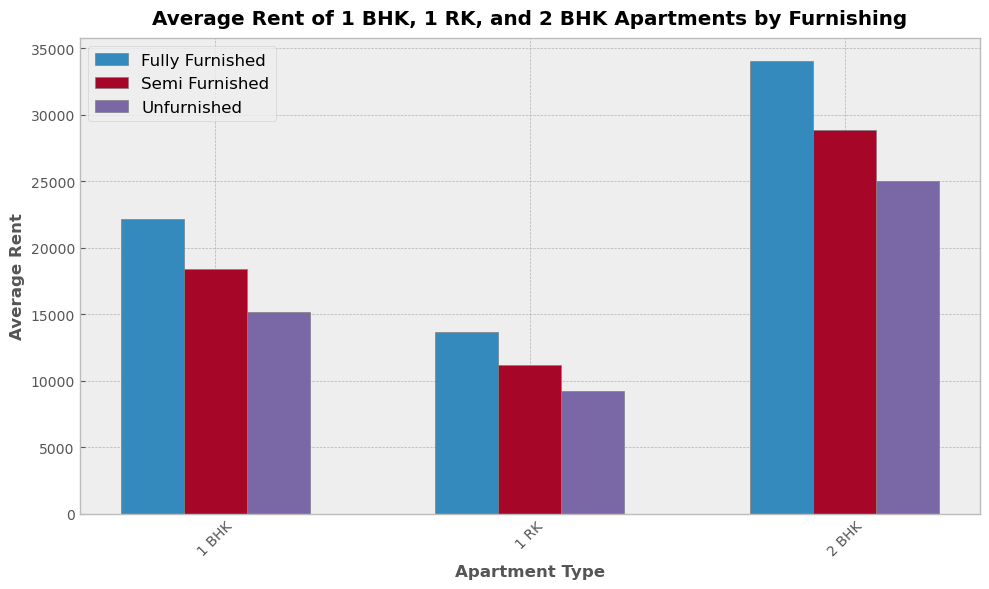

In [33]:
# Data for average rent by apartment type and furnishing. 
apartment_types = ['1 BHK', '1 RK', '2 BHK']
fully_furnished = [22167.0, 13700.0, 34090.0]
semi_furnished = [18406.0, 11175.0, 28836.0]
unfurnished = [15168.0, 9248.0, 25002.0]

# Setting the width of the bars.
bar_width = 0.2

# Setting the position of the bars on the x-axis. 
r1 = np.arange(len(apartment_types))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar chart. 
plt.figure(figsize=(10, 6))
plt.bar(r1, fully_furnished, width=bar_width, edgecolor='grey', label='Fully Furnished')
plt.bar(r2, semi_furnished, width=bar_width, edgecolor='grey', label='Semi Furnished')
plt.bar(r3, unfurnished, width=bar_width, edgecolor='grey', label='Unfurnished')
plt.title('Average Rent of 1 BHK, 1 RK, and 2 BHK Apartments by Furnishing', fontweight='bold', pad=10)
plt.xlabel('Apartment Type', fontweight='bold')
plt.ylabel('Average Rent', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(apartment_types))], apartment_types) 
plt.legend(fontsize='large', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The bar chart underscores a consistent trend across all apartment types 1 BHK, 1 RK, and 2 BHK where fully furnished units command higher rents compared to semi-furnished and unfurnished ones. This observation suggests a robust preference among tenants for fully equipped living spaces, likely driven by convenience and lifestyle preferences. Landlords and property owners may capitalize on this demand by investing in furnishing options that enhance the appeal and marketability of their rental properties.

In [34]:
# Preferred Tenants by House Owners. 

df['PREFERRED_TENANTS'].value_counts() 

Family                     803
All                        631
Company                     33
Bachelor                    31
Family, Company             22
Family, Female               6
Family, Female, Company      3
Male                         3
Family, Bachelor             3
Family, Male                 3
Female                       2
Company, Bachelor            1
Family, Male, Company        1
Male, Family, Company        1
Family, Company, Female      1
Company, Family              1
Female, Family, Company      1
Name: PREFERRED_TENANTS, dtype: int64

In [35]:
# As observed above, some house owners allow tenants with multiple categories, which are categorized under 
# Multiple Options to maintain clarity and organization.

single_option = ['Family','Company','All','Bachelor'] 

df['PREFERRED_TENANTS'] = df['PREFERRED_TENANTS'].apply(lambda x: x if x in single_option else 'Multiple Options') 

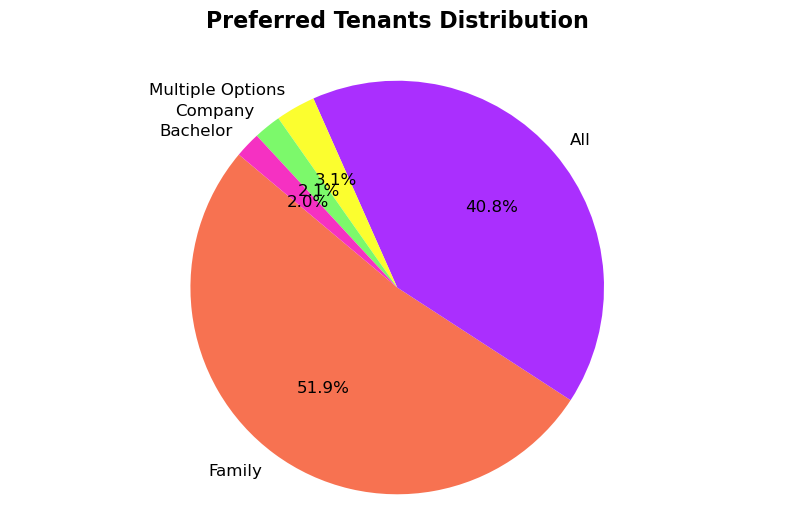

In [36]:
# Data for preferred tenants. 
labels = ['Family', 'All', 'Multiple Options', 'Company', 'Bachelor']
sizes = [803, 631, 48, 33, 31]
colors = ['#F77251', '#AA2FFE', '#FBFE2F', '#7CF96B', '#F531C2']

# Plotting the pie chart.
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Preferred Tenants Distribution', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')  

plt.show()

### In the pie chart above, approximately 52 percent of house owners prefer only families as tenants, while about 41 percent are open to renting to anyone. Bachelor accommodations make up 2 percent, and there are 3 percent of options allowing multiple categories. Additionally, there are 2 percent for accommodating company employees. Based on these findings, it's evident that families have an easier time finding accommodation compared to others, who may need to exert more effort in their search.

In [37]:
# Some house owners have mentioned the dates from which their apartments are available. 
# Converting those dates into a standard format to maintain consistency and cleanliness in the column data.

df['APRTMENT_AVAILABLE_FROM'] = df['APRTMENT_AVAILABLE_FROM'].apply(lambda x: x if x == 'Ready to Move' else 'Given Date')

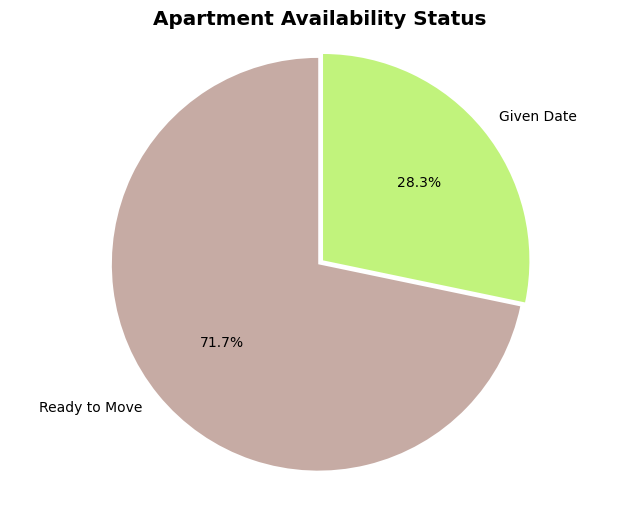

In [38]:
# Data for apartment availability .
statuses = ['Ready to Move', 'Given Date']
counts = [1109, 437]
colors = ['#C6ABA4', '#C1F37C']

# Plotting pie chart. 
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=statuses, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.03, 0))
plt.title('Apartment Availability Status', fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### In the above pie chart, we observe that approximately 72 percent of the houses are categorized as Ready to Move, while the remaining 28 percent are available from a Given Date. This insight is valuable for individuals seeking immediate accommodation and those with more flexible timelines for relocation.

## Step 5: Conclusion. 

### In essence, this project exemplifies the synergy between web scraping and data analytics in the real estate domain, particularly within Thane city. By leveraging cutting-edge technologies and robust analytical methodologies, I unearthed valuable insights that empower both tenants and landlords to navigate the rental property landscape with confidence and clarity. As technology continues to evolve, projects like these underscores the transformative potential of data-driven approaches in reshaping industries and empowering decision-makers. 